## Project Description: Twitter US Airline Sentiment 
### Data Description: 
A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from 
February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed 
by categorizing negative reasons (such as "late flight" or "rude service"). 



### 1.  Import the libraries, load dataset, print shape of data, data description. (5 Marks)

In [ ]:
# Import the libraries
import re, string, unicodedata
import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd                                 #for data manipulation and analysis
import nltk                                         #Natural language processing tool-kit
!pip install contractions
import contractions                                 #Import contractions library

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

#import sys  
#!{sys.executable} -m pip install contractions

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer
from nltk.tokenize import word_tokenize 


from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF

!pip install vaderSentiment

     |████████████████████████████████| 266kB 10.7MB/s 
     |████████████████████████████████| 327kB 16.2MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85397 sha256=fe016f7cda3a9addff22126f3e104afbf3bb5ef7e869793e8bdaa2d51c3719a6
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
     |████████████████████████████████| 133kB 9.9MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset.
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/NLP Project/Tweets.csv')

In [ ]:
#Provides the shape of the data set
dataset.shape

(14640, 15)

In [ ]:
# Provides the description of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [ ]:
dataset.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

### 2.  Understand of data-columns: (5 Marks) 
    a.  Drop all other columns except “text” and “airline_sentiment”. 

    b.  Check the shape of data. 

    c.  Print first 5 rows of data. 

In [ ]:
# a. Drop the unwanted columns except "text" and "airline_sentiment"
#    Note that there are no NA values in these two columns as shown in isna().sum() code above

data = dataset.drop(['tweet_id','airline_sentiment_confidence','negativereason', 'negativereason_confidence', 'airline','name',
                     'negativereason_gold', 'retweet_count', 'tweet_coord', 'tweet_created', 'tweet_location', 'user_timezone',
                    'airline_sentiment_gold'], axis = 1)

In [ ]:
# b. check the shape of data
data.shape

(14640, 2)

In [ ]:
#c. print first 5 rows of data
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


### 3.  Text pre-processing: Data preparation. (20 Marks) 
    a.  Html tag removal. 
    b.  Tokenization. 
    c.  Remove the numbers. 
    d.  Removal of Special Characters and Punctuations. 
    e.  Conversion to lowercase. 
    f.  Lemmatize or stemming. 
    g.  Join the words in the list to convert back to text string in the dataframe. (So that each row 
    contains the data in text format.) 
    h.  Print first 5 rows of data after pre-processing. 

In [ ]:
# a. Removal of the http link using Regular Expression.

# Using BeautifulSoup to remove html tags

# text in each line is replaced by clean_text which has been processed by html.parser
# 
from bs4 import BeautifulSoup
for i, row in data.iterrows():
    clean_text = BeautifulSoup(data.at[i, 'text'], "html.parser")
    data.at[i,'text'] = clean_text
data.head()

,airline_sentiment,text
0,neutral,[@VirginAmerica What @dhepburn said.]
1,positive,[@VirginAmerica plus you've added commercials ...
2,neutral,[@VirginAmerica I didn't today... Must mean I ...
3,negative,[@VirginAmerica it's really aggressive to blas...
4,negative,[@VirginAmerica and it's a really big bad thin...


In [ ]:
# We will replace contractions first and then remove the punctuation
for i, row in data.iterrows():
    clean_text = contractions.fix(str(data.at[i, 'text']))
    data.at[i,'text'] = clean_text
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials...
2,neutral,@VirginAmerica I did not today... Must mean I ...
3,negative,@VirginAmerica it is really aggressive to blas...
4,negative,@VirginAmerica and it is a really big bad thin...


In [ ]:
# c. Remove numbers and d. Remove special characters and punctuations
#     performed in one step


for i, row in data.iterrows():
    pattern = r'[^a-zA-Z\s]' 
    text1 = data.at[i, 'text']
    
    clean_text= re.sub(pattern,'', str(text1) )
    data.at[i,'text'] = clean_text
data.head(10)

,airline_sentiment,text
0,neutral,VirginAmerica What dhepburn said
1,positive,VirginAmerica plus you have added commercials ...
2,neutral,VirginAmerica I did not today Must mean I need...
3,negative,VirginAmerica it is really aggressive to blast...
4,negative,VirginAmerica and it is a really big bad thing...
5,negative,VirginAmerica seriously would pay a flight fo...
6,positive,VirginAmerica yes nearly every time I fly VX t...
7,neutral,VirginAmerica Really missed a prime opportunit...
8,positive,virginamerica Well I did notbut NOW I DO D
9,positive,VirginAmerica it was amazing and arrived an ho...


In [ ]:
#e. Conversion to lower case
for i, row in data.iterrows():
    text1 = data.at[i, 'text']
    data.at[i,'text'] = text1.lower()
    
data.head(10)

,airline_sentiment,text
0,neutral,virginamerica what dhepburn said
1,positive,virginamerica plus you have added commercials ...
2,neutral,virginamerica i did not today must mean i need...
3,negative,virginamerica it is really aggressive to blast...
4,negative,virginamerica and it is a really big bad thing...
5,negative,virginamerica seriously would pay a flight fo...
6,positive,virginamerica yes nearly every time i fly vx t...
7,neutral,virginamerica really missed a prime opportunit...
8,positive,virginamerica well i did notbut now i do d
9,positive,virginamerica it was amazing and arrived an ho...


In [ ]:
#b. tokenization

from nltk.tokenize.toktok import ToktokTokenizer
tokenizer=ToktokTokenizer()
for i, row in data.iterrows():
    tokenized_text= tokenizer.tokenize(data.at[i, 'text'])
    data.at[i,'text'] = tokenized_text
data.head()

,airline_sentiment,text
0,neutral,"[virginamerica, what, dhepburn, said]"
1,positive,"[virginamerica, plus, you, have, added, commer..."
2,neutral,"[virginamerica, i, did, not, today, must, mean..."
3,negative,"[virginamerica, it, is, really, aggressive, to..."
4,negative,"[virginamerica, and, it, is, a, really, big, b..."


In [ ]:
stopwords

['has',
 'at',
 'theirs',
 'off',
 'hers',
 'here',
 'had',
 "it's",
 'being',
 'some',
 'what',
 'which',
 'her',
 "you're",
 'been',
 're',
 'itself',
 'above',
 'can',
 'yours',
 'further',
 'have',
 'few',
 'aren',
 'am',
 'against',
 'how',
 'they',
 'myself',
 'whom',
 'these',
 'me',
 'your',
 'most',
 'doing',
 'same',
 'should',
 'that',
 'there',
 'yourselves',
 'you',
 'from',
 'during',
 "you'll",
 'couldn',
 'ain',
 'we',
 'his',
 'she',
 'having',
 'them',
 'himself',
 'other',
 'a',
 'through',
 'down',
 'both',
 'when',
 'more',
 'all',
 'no',
 "should've",
 't',
 'so',
 'will',
 'any',
 'ourselves',
 'each',
 'was',
 'do',
 'to',
 'with',
 'is',
 'were',
 'in',
 'then',
 'below',
 "you'd",
 'just',
 'until',
 'again',
 'themselves',
 'by',
 'than',
 'did',
 'between',
 "aren't",
 'herself',
 'over',
 'don',
 'where',
 've',
 'about',
 'be',
 'and',
 'under',
 's',
 'very',
 'on',
 'such',
 'yourself',
 'll',
 'does',
 'are',
 'he',
 'its',
 'it',
 'own',
 "you've",
 'i

In [ ]:
#Remove custom list to remove the negation being taken out as part of stopwords

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.
stopwords = list(set(stopwords) - set(customlist))  

In [ ]:
#implement stopwords
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

data['text'] = data.apply(lambda row: remove_stopwords(row['text']), axis=1)
data.head()

,airline_sentiment,text
0,neutral,"[virginamerica, dhepburn, said]"
1,positive,"[virginamerica, plus, added, commercials, expe..."
2,neutral,"[virginamerica, not, today, must, mean, need, ..."
3,negative,"[virginamerica, really, aggressive, blast, obn..."
4,negative,"[virginamerica, really, big, bad, thing]"


In [ ]:
from nltk.stem import LancasterStemmer, WordNetLemmatizer

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

In [ ]:
#f. Lemmatization step


for i, row in data.iterrows():
    words = data.at[i, 'text']
    lemmas = lemmatize_verbs(words)
    data.at[i,'text'] = lemmas
    
data.head(10)

,airline_sentiment,text
0,neutral,"[virginamerica, dhepburn, say]"
1,positive,"[virginamerica, plus, add, commercials, experi..."
2,neutral,"[virginamerica, not, today, must, mean, need, ..."
3,negative,"[virginamerica, really, aggressive, blast, obn..."
4,negative,"[virginamerica, really, big, bad, thing]"
5,negative,"[virginamerica, seriously, would, pay, flight,..."
6,positive,"[virginamerica, yes, nearly, every, time, fly,..."
7,neutral,"[virginamerica, really, miss, prime, opportuni..."
8,positive,"[virginamerica, well, notbut]"
9,positive,"[virginamerica, amaze, arrive, hour, early, good]"


In [ ]:
#g.  Join the words in the list to convert back to text string in the dataframe. (So that each row 
#     contains the data in text format.)
for i, row in data.iterrows():
    text1 = data.at[i, 'text']
    clean_text= ' '.join(text1)
    data.at[i,'text'] = clean_text
data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience ...
2,neutral,virginamerica not today must mean need take an...
3,negative,virginamerica really aggressive blast obnoxiou...
4,negative,virginamerica really big bad thing


### 4.  Vectorization: (10 Marks) 
    a.  Use CountVectorizer. 
    b.  Use TfidfVectorizer. 

In [ ]:
# a. Count Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
data_features1 = vectorizer.fit_transform(data['text'])

data_features1 = data_features1.toarray()                        # Convert the data features to array.

In [ ]:
data_features1.shape

(14640, 1000)

In [ ]:
# Convert labels in airline sentiment category variable to numeric values of 1, 2, & 3
data['airline_sentiment'] = data['airline_sentiment'].map({'negative':1,'neutral':2, 'positive':3})
data.head()

,airline_sentiment,text
0,2,virginamerica dhepburn say
1,3,virginamerica plus add commercials experience ...
2,2,virginamerica not today must mean need take an...
3,1,virginamerica really aggressive blast obnoxiou...
4,1,virginamerica really big bad thing


In [ ]:
labels = data['airline_sentiment']
labels = labels.astype('int')

In [ ]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(data_features1, labels, test_size=0.3, random_state=42)

In [ ]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest1 = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest1 = forest1.fit(X_train1, y_train1)

print(forest1)

print(np.mean(cross_val_score(forest1, data_features1, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7107923497267759


In [ ]:
# Predict the result for test data using the model built above.

result1 = forest1.predict(X_test1)

## The next steps are for TfidfVectorizer

In [ ]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 1000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [ ]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7115437158469945


In [ ]:
result2 = forest.predict(X_test)

## 5.  Fit and evaluate model using both type of vectorization. (6+6 Marks) 

[[2489  239   86]
 [ 357  451   76]
 [ 169  124  401]]


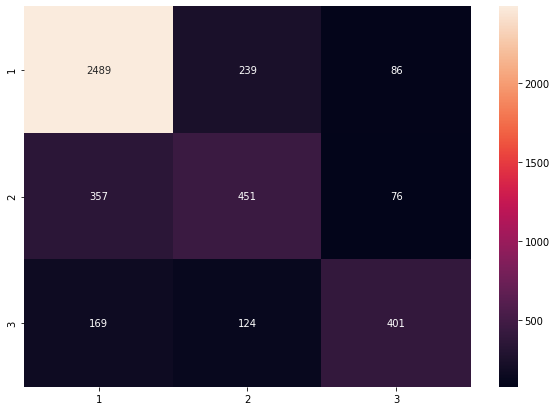

In [ ]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
#This is for Count Vectorization 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat1 = confusion_matrix(y_test1, result1)

print(conf_mat1)

df_cm = pd.DataFrame(conf_mat1, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

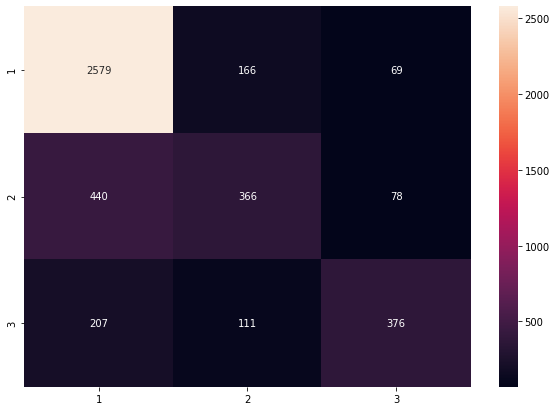

In [ ]:
# Confusion Matrix for TfIDF Vectorization
#
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result2)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [ ]:
#Print Testing Accuracy Scores for both models
print('Testing Accuracy Score for Count Vectorizer')
print(forest1.score(X_test1, y_test1))
print('Testing Accuracy Score for TfIDf Vectorizer')
print(forest.score(X_test, y_test))

Testing Accuracy Score for Count Vectorizer
0.7607012750455373
Testing Accuracy Score for TfIDf Vectorizer
0.7561475409836066


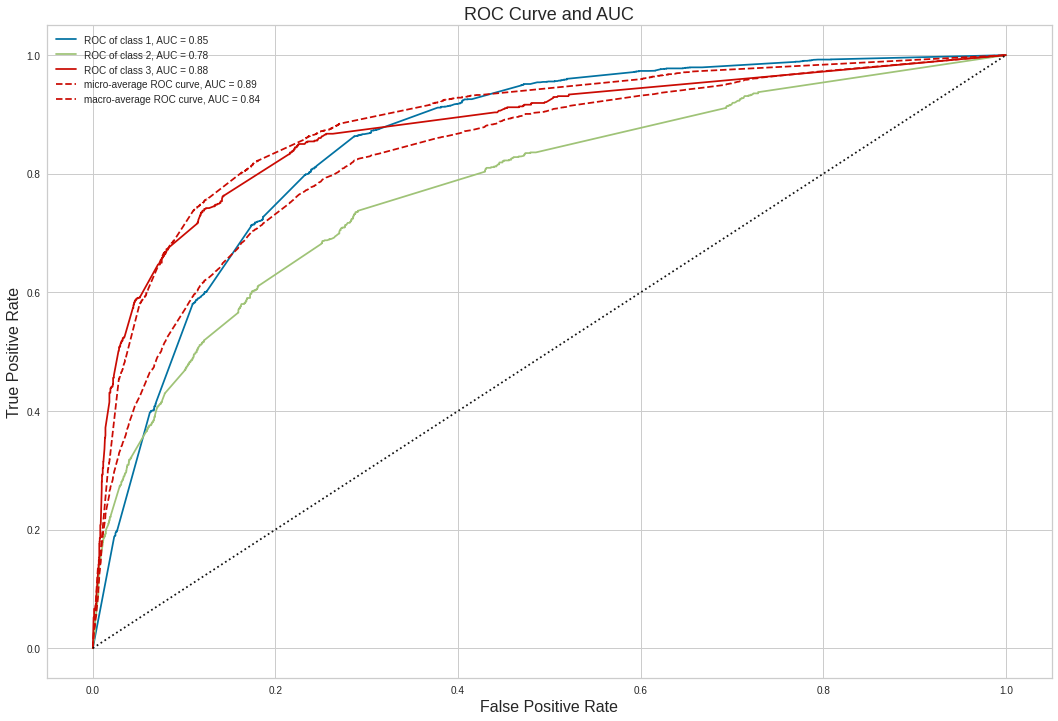

In [ ]:
from yellowbrick.classifier import ClassificationReport, ROCAUC

# Visualize model performance with yellowbrick library for Count Vectorization
plt.figure(figsize=(18,12))
plt.title("ROC Curve and AUC", fontsize=18)
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
visualizer = ROCAUC(forest1, classes=[1,2,3])
visualizer.fit(X_train1, y_train1)
visualizer.score(X_test1, y_test1)
plt.legend()

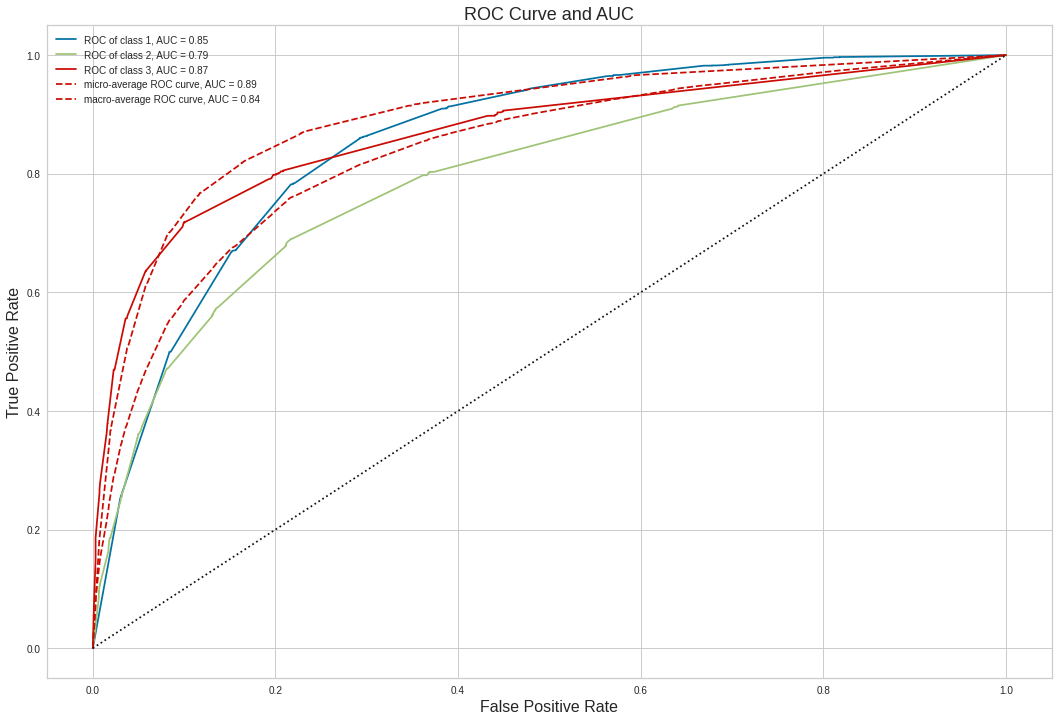

In [ ]:
from yellowbrick.classifier import ClassificationReport, ROCAUC

# Visualize model performance with yellowbrick library for TfIDF Vectorization
plt.figure(figsize=(18,12))
plt.title("ROC Curve and AUC", fontsize=18)
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
visualizer = ROCAUC(forest, classes=[1,2,3])
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
plt.legend()

0.7566029143897997

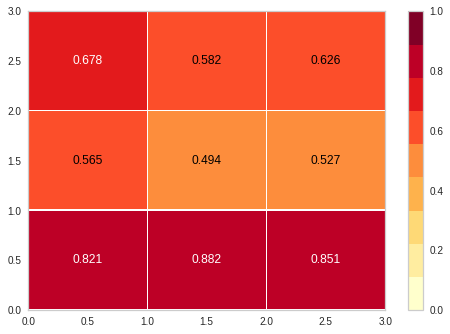

In [ ]:
# Visualize model performance with yellowbrick library
# Count Vectorizer Report
#This function shows Precision Recall and F1 score for each Class
classes = [1,2,3]

viz = ClassificationReport(forest1, classes=classes, support=False)

viz.fit(X_train1, y_train1)        # Fit the visualizer and the model
viz.score(X_test1, y_test1)        # Evaluate the model on the test data
                    # Finalize and show the figure


0.7572859744990893

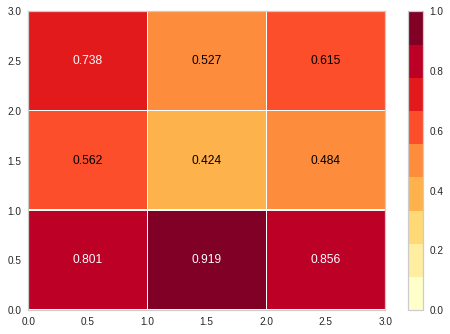

In [ ]:
# Visualize model performance with yellowbrick library
#TfIdf Vectorizer Report
##This function shows Precision Recall and F1 score for each Class
classes = [1,2,3]

viz = ClassificationReport(forest, classes=classes, support=False)

viz.fit(X_train, y_train)        # Fit the visualizer and the model
viz.score(X_test, y_test)        # Evaluate the model on the test data
#viz.show()                       # Finalize and show the figure


## Evaluation of Count Vectorizer and TfIDF Vectorizer

Even though both Count Vectorizer and TfIDF vectorizer gave very similar testing accuracy, we see that within the different classes there are differences. 
TfIDF Vectorizer appears to do better at finding TP for Class 1 (negative) and as a result Class 1 scores are better that Count Vectorizer Class 1 scores. 

## 6.  Summarize your understanding of the application of Various Pre-processing and Vectorization and performance of your model on this dataset. (8 Marks) 

* Pre-processing steps are very important in NLP
* We used comments made by airline customers and classified the comments in negative, neutral and positive. 
* The data was pre-processed using various techniques and libraries. 
* The pre-processing required appropriate sequence because operations such as contractions remover should be used before removing the punctuation marks. 
* Also, the operations such as number remover, punctuation mark remover, lower case conversion should be performed before using tokenization.
* Lemmatization and Stopwords remover should be used after tokenization.
* The join words should be used at the end of pre-processing before going to the step of vectorizer.
* We used two types of Vectorizers Count Vectorizer and TfIDF vectorizer to convert the text data to numbers.
* The model performed well with 75-76% accuracy. 
* It may have been possible to increase the accuracy of the model by increasing the size of the dataset or by making the data more balanced. 
* Notice that large percentage of data points are for negative comments.
* Another way to increase the accuracy may be to add variations in pre-processing. 
* As a variation of pre-processing, I tried the revision of removing Stopwords. This impacted CountVectorizer and it seemed that TP for neutral and positive classes was reduced. 